# 例1 显示手写体数字图片经PCA压缩后的二维空间可视化

In [1]:
import pandas as pd
digits_train = pd.read_csv("./Datasets/optdigits/optdigits.tra", header=None)

print("digits_train.shape=", digits_train.shape)
digits_train.head()

digits_train.shape= (3823, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [2]:
import numpy as np
x_digits = digits_train[np.arange(64)]
y_digits = digits_train[64]
y_digits.value_counts()

3    389
1    389
7    387
4    387
9    382
8    380
2    380
6    377
5    376
0    376
Name: 64, dtype: int64

In [3]:
from sklearn.decomposition import PCA
estimator = PCA(n_components=2)  # 64维压缩至2维，便于可视化
x_pca = estimator.fit_transform(x_digits)
x_pca.shape

(3823, 2)

/opt/app/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/opt/app/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


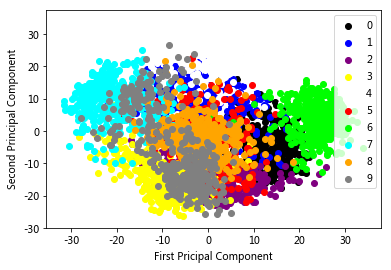

In [5]:
from matplotlib import pyplot  as plt
colors = ['black','blue','purple','yellow','white','red','lime','cyan','orange','gray']  # len=10, 对应 y_digits 的 10 个label

for i in range(len(colors)):  # 一个类一个类画
    px = x_pca[:,0][y_digits.as_matrix()==i]  #第一列为x，筛选行为第i类
    py = x_pca[:,1][y_digits.as_matrix()==i]
    plt.scatter(px, py, c=colors[i])

plt.legend(np.arange(0,10).astype(str))
plt.xlabel("First Pricipal Component")
plt.ylabel("Second Principal Component")
plt.show()

# 例2 PCA压缩前后，训练模型结果的差异

In [1]:
import pandas as pd
digits_train = pd.read_csv("./Datasets/optdigits/optdigits.tra", header=None)
digits_test = pd.read_csv("./Datasets/optdigits/optdigits.tes", header=None)

print("digits_train.shape=", digits_train.shape)
digits_train.head()

digits_train.shape= (3823, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [2]:
import numpy as np
x_train = digits_train[np.arange(64)]
y_train = digits_train[64]
x_test = digits_test[np.arange(64)]
y_test = digits_test[64]

In [3]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(x_train, y_train)
y_predict = svc.predict(x_test)

/opt/app/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [4]:
from sklearn.decomposition import PCA
estimator = PCA(n_components=20)  # 指定降至20维
pca_x_train = estimator.fit_transform(x_train)
pca_x_test = estimator.transform(x_test)

In [5]:
pca_svc = LinearSVC()
pca_svc.fit(pca_x_train, y_train)
pca_y_predict = pca_svc.predict(pca_x_test)

/opt/app/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [6]:
from sklearn.metrics import classification_report
print("svc score:", svc.score(x_test, y_test))
print(classification_report(y_test, y_predict, target_names=np.arange(10).astype(str)))
print("-----------------------------------------------------------")
print("pca svc score:", pca_svc.score(pca_x_test, y_test))
print(classification_report(y_test, pca_y_predict, target_names=np.arange(10).astype(str)))

svc score: 0.9282136894824707
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       178
           1       0.84      0.94      0.89       182
           2       0.99      0.97      0.98       177
           3       0.94      0.92      0.93       183
           4       0.95      0.97      0.96       181
           5       0.91      0.97      0.94       182
           6       0.99      0.97      0.98       181
           7       0.98      0.91      0.94       179
           8       0.93      0.74      0.82       174
           9       0.80      0.91      0.85       180

   micro avg       0.93      0.93      0.93      1797
   macro avg       0.93      0.93      0.93      1797
weighted avg       0.93      0.93      0.93      1797

-----------------------------------------------------------
pca svc score: 0.9159710628825821
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       178
        